In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [27]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [28]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [29]:
x_train.shape

(60000, 28, 28)

In [30]:
y_train.shape

(60000,)

In [31]:
y_train = y_train.reshape(-1,1)
y_train.shape

(60000, 1)

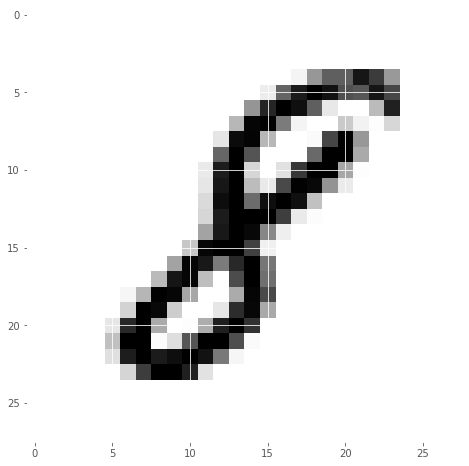

In [32]:
plt.imshow(x_train[7777], cmap='binary')

In [33]:
x_test.shape

(10000, 28, 28)

In [34]:
y_test.shape

(10000,)

In [35]:
y_test = y_test.reshape(-1,1)
y_test.shape

(10000, 1)

In [36]:
print(y_train[0])

[5]


In [37]:
#one hot encoding
from tensorflow.keras.utils import to_categorical

In [38]:
y_train_encoded = to_categorical(y_train,dtype = np.int16)
y_train_encoded.shape

(60000, 10)

In [39]:
y_test_encoded = to_categorical(y_test,dtype = np.int16)
y_test_encoded.shape

(10000, 10)

In [40]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_train.shape

(60000, 784)

In [41]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
x_test.shape

(10000, 784)

In [42]:
x_mean = np.mean(x_train)
x_std = np.std(x_train)
epsilon = 1e-10
x_train = (x_train-x_mean)/(x_std+epsilon)
x_test = (x_test-x_mean)/(x_std+epsilon)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
model = Sequential([
    Dense(128,activation = 'relu',input_shape = (784,)),
    Dense(128,activation = 'relu'),
    Dense(10,activation = 'softmax')
]   
)

In [45]:
model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [46]:
y_train_encoded[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int16)

In [47]:
model.fit(x_train,y_train_encoded,epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3672 - acc: 0.8936
Epoch 2/3
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1831 - acc: 0.9475
Epoch 3/3
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1372 - acc: 0.9598


In [48]:
loss,accuracy = model.evaluate(x_test,y_test_encoded)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.1298 - acc: 0.9609


In [49]:
accuracy

0.9609

In [50]:
y_pred = model.predict(x_train)
y_pred.shape

(60000, 10)